## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more. (Remember: in **logistic** regression, the dependent variable should be categorical and independent variables can have a mix of continuous and categorical variables. In **linear** regression, the dependent variable should be continuous.)
## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (**dependent variable**)
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


## Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
The notebook should be submitted as an HTML file (.html) and NOT as a notebook file (.ipynb)
Submission Guidelines :

 1. The submission should be a well-commented Jupyter notebook [format - .HTML]

 2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks

 3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation

 4. Submission will not be evaluated if,

it is submitted post-deadline, or,
more than 1 file is submitted.

Happy Learning!!

## Scoring guide (Rubric) - Personal Loan Campaign Modelling
	
#### 1) Perform an Exploratory Data Analysis on the data
- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive 5

#### Illustrate the insights based on EDA
- Key meaningful observations on the relationship between variables
3

#### 2) Data Pre-processing
- Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed), Feature Engineering, Prepare data for modelling and check the split
6

#### 3) Model building - Logistic Regression
- Build the logistic regression model. - Comment on model performance
4

#### Model performance evaluation and improvement
- Comment on which metric is right for model performance evaluation and why? - Can model performance be improved? If yes, then do it using appropriate techniques for logistic regression and comment on model performance after improvement
5

#### 4) Model building - Decision Tree
- Build the model and comment on the model performance. - Identify the key variables that have a strong relationship with the dependent variable - Comment on model performance
4

#### Model performance evaluation and improvement
- Try pruning technique(s) - Evaluate the model on appropriate metric - Comment on model performance
5

#### 5) Actionable Insights & Recommendations
- Compare decision tree and Logistic regression - Conclude with the key takeaways for the marketing team - what would your advice be on how to do this campaign?
5

#### Notebook - Overall
- Structure and flow - Well commented code
3

### Import the necessary packages

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To build model for logistic prediction

from sklearn.linear_model import LogisticRegression

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Command to tell Python to actually display the graphs
%matplotlib inline

# open-source Python graphing library for building beautiful, interactive visualizations, and showing exact numbers
!pip install plotly
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler

<IPython.core.display.Javascript object>

### Read the dataset

In [2]:
df0 = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
df = df0.copy()

<IPython.core.display.Javascript object>

In [4]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<IPython.core.display.Javascript object>

In [5]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

<IPython.core.display.Javascript object>

In [6]:
np.random.seed(1)
df.sample(n=10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1    2.9          3   
4767  4768   35           9      45    90639       3    0.9          1   
3814  3815   34           9      35    94304       3    1.3          1   
3499  3500   49          23     114    94550       1    0.3          1   
2735  2736   36          12      70    92131       3    2.6          2   
3922  3923   31           4      20    95616       4    1.5          2   
2701  2702   50          26      55    94305       1    1.6          2   
1179  1180   36          11      98    90291       3    1.2          3   
932    933   51          27     112    94720       3    1.8          2   
792    793   41          16      98    93117       1    4.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [7]:
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 5000 rows and 14 columns.


<IPython.core.display.Javascript object>

#### Let's create a list of numerical and categorical columns

### Check the data types of the columns for the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [9]:
df["ID"] = df["ID"].astype(object)
df["ZIPCode"] = df["ZIPCode"].astype(object)
df["Personal_Loan"] = df["Personal_Loan"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   object  
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   object  
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(10), object(2)
memory usage: 512.9+ KB


<IPython.core.display.Javascript object>

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.describe(include=["object"]).columns
print("Categorical Columns:     ", cat_cols)
print("Numeric Columns:    ", numeric_cols)

Categorical Columns:      Index(['ID', 'ZIPCode'], dtype='object')
Numeric Columns:     Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


<IPython.core.display.Javascript object>

**Observations -**
* Personal_Loan is the dependent variable - type integer.
* ID, ZIPCode are object type, while CCAvg is float type.

### Summary of the dataset

In [11]:
df.describe(include="all")

ID          Age   Experience       Income  ZIPCode       Family  \
count   5000.0  5000.000000  5000.000000  5000.000000   5000.0  5000.000000   
unique  5000.0          NaN          NaN          NaN    467.0          NaN   
top        1.0          NaN          NaN          NaN  94720.0          NaN   
freq       1.0          NaN          NaN          NaN    169.0          NaN   
mean       NaN    45.338400    20.104600    73.774200      NaN     2.396400   
std        NaN    11.463166    11.467954    46.033729      NaN     1.147663   
min        NaN    23.000000    -3.000000     8.000000      NaN     1.000000   
25%        NaN    35.000000    10.000000    39.000000      NaN     1.000000   
50%        NaN    45.000000    20.000000    64.000000      NaN     2.000000   
75%        NaN    55.000000    30.000000    98.000000      NaN     3.000000   
max        NaN    67.000000    43.000000   224.000000      NaN     4.000000   

              CCAvg    Education     Mortgage  Personal_Loan  \
count   5000.000000  5000.000000  5000.000000         5000.0   
unique          NaN          NaN          NaN            2.0   
top             NaN          NaN          NaN            0.0   
freq            NaN          NaN          NaN         4520.0   
mean       1.937938     1.881000    56.498800            NaN   
std        1.747659     0.839869   101.713802            NaN   
min        0.000000     1.000000     0.000000            NaN   
25%        0.700000     1.000000     0.000000            NaN   
50%        1.500000     2.000000     0.000000            NaN   
75%        2.500000     3.000000   101.000000            NaN   
max       10.000000     3.000000   635.000000            NaN   

        Securities_Account  CD_Account       Online   CreditCard  
count          5000.000000  5000.00000  5000.000000  5000.000000  
unique                 NaN         NaN          NaN          NaN  
top                    NaN         NaN          NaN          NaN  
freq                   NaN         NaN          NaN          NaN  
mean              0.104400     0.06040     0.596800     0.294000  
std               0.305809     0.23825     0.490589     0.455637  
min               0.000000     0.00000     0.000000     0.000000  
25%               0.000000     0.00000     0.000000     0.000000  
50%               0.000000     0.00000     1.000000     0.000000  
75%               0.000000     0.00000     1.000000     1.000000  
max               1.000000     1.00000     1.000000     1.000000

<IPython.core.display.Javascript object>

#### Summary of the numerical data

In [12]:
df.describe().T

count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0  20.104600   11.467954  -3.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869   1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0   
Securities_Account  5000.0   0.104400    0.305809   0.0   0.0   0.0    0.0   
CD_Account          5000.0   0.060400    0.238250   0.0   0.0   0.0    0.0   
Online              5000.0   0.596800    0.490589   0.0   0.0   1.0    1.0   
CreditCard          5000.0   0.294000    0.455637   0.0   0.0   0.0    1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Securities_Account    1.0  
CD_Account            1.0  
Online                1.0  
CreditCard            1.0

<IPython.core.display.Javascript object>

In [13]:
df.describe()

Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200     2.396400     1.937938   
std      11.463166    11.467954    46.033729     1.147663     1.747659   
min      23.000000    -3.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Securities_Account  CD_Account       Online  \
count  5000.000000  5000.000000         5000.000000  5000.00000  5000.000000   
mean      1.881000    56.498800            0.104400     0.06040     0.596800   
std       0.839869   101.713802            0.305809     0.23825     0.490589   
min       1.000000     0.000000            0.000000     0.00000     0.000000   
25%       1.000000     0.000000            0.000000     0.00000     0.000000   
50%       2.000000     0.000000            0.000000     0.00000     1.000000   
75%       3.000000   101.000000            0.000000     0.00000     1.000000   
max       3.000000   635.000000            1.000000     1.00000     1.000000   

        CreditCard  
count  5000.000000  
mean      0.294000  
std       0.455637  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

<IPython.core.display.Javascript object>

**Observations-**   

* Average personal loans are 0.096.
* Most customers are near 55 years old.
* Average annual income among customers was $64,000.

#### Checking different levels in categorical data

In [14]:
# Checking value counts of categorical variables
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)
    print(df[i].value_counts(1))
    print("*" * 50)

Unique values in ID are :
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: ID, Length: 5000, dtype: int64
**************************************************
1       0.0002
3331    0.0002
3338    0.0002
3337    0.0002
3336    0.0002
         ...  
1667    0.0002
1666    0.0002
1665    0.0002
1664    0.0002
5000    0.0002
Name: ID, Length: 5000, dtype: float64
**************************************************
Unique values in ZIPCode are :
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
90068      1
93077      1
94970      1
94598      1
96145      1
Name: ZIPCode, Length: 467, dtype: int64
**************************************************
94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
90068    0.0002
93077    0.0002
94970    0.0002
94598    0.0002
96145    0.0002
Name: ZIPCode, Length: 467, dtype: float64
************************************

<IPython.core.display.Javascript object>

* There are some values represented by a 'unkown' in workclass, occupation, and native country columns which we should investigate further.
* There are many distinct values in native_country that can be reduced to their respective continents.
* The distinct levels of marital_status can also be reduced.

In [15]:
# checking for unique values in ID column
df["ID"].nunique()

5000

<IPython.core.display.Javascript object>

* Since all the values in ID column are unique we can drop it

In [16]:
# df.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
# checking the number of uniques in the zip code
df["ZIPCode"].nunique()

467

<IPython.core.display.Javascript object>

* There are 467 unique values in the zip code.
* In the US, The first digit of a PIN indicates the zone or a region, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district
* Let's try to group them based on the first 2 digits to reduce the number of unique values in the ZIPCode column.

In [18]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    df["ZIPCode"].str[0:2].nunique(),
)
df["ZIPCode"] = df["ZIPCode"].str[0:2]

df["ZIPCode"] = df["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


<IPython.core.display.Javascript object>

In [19]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
df[cat_cols] = df[cat_cols].astype("category")

<IPython.core.display.Javascript object>

### Check for missing values

In [20]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing vaues in out dataset

# 1) Perform an Exploratory Data Analysis on the data

### Note: The EDA section of the notebook has been covered multiple times in the previous case studies. For this discussion, EDA section can be skipped and we can refer to the **<a href = #link>EDA summary</a>** below. For the detailed EDA, **<a href = #link1>Appendix Section</a>** can be referred. 

#### The below three functions need to be defined to carry out the Exploratory Data Analysis.

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>
**Data Description:**

* Dependent variable is the salary which is of categorical data type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type
* There are no missing values in the dataset.

**Data Cleaning:**

* We observed that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replaced these ?'s with the 'unknown' category.
* There are 42 distinct countries in the data set, which were reduced to their respective continents to reduce the dimension of data and we now have only 5 distinct values in the data.
* We reduced the distinct groups of marital_status to three categories: Married, Not-Married and Never-Married.

**Observations from EDA:**


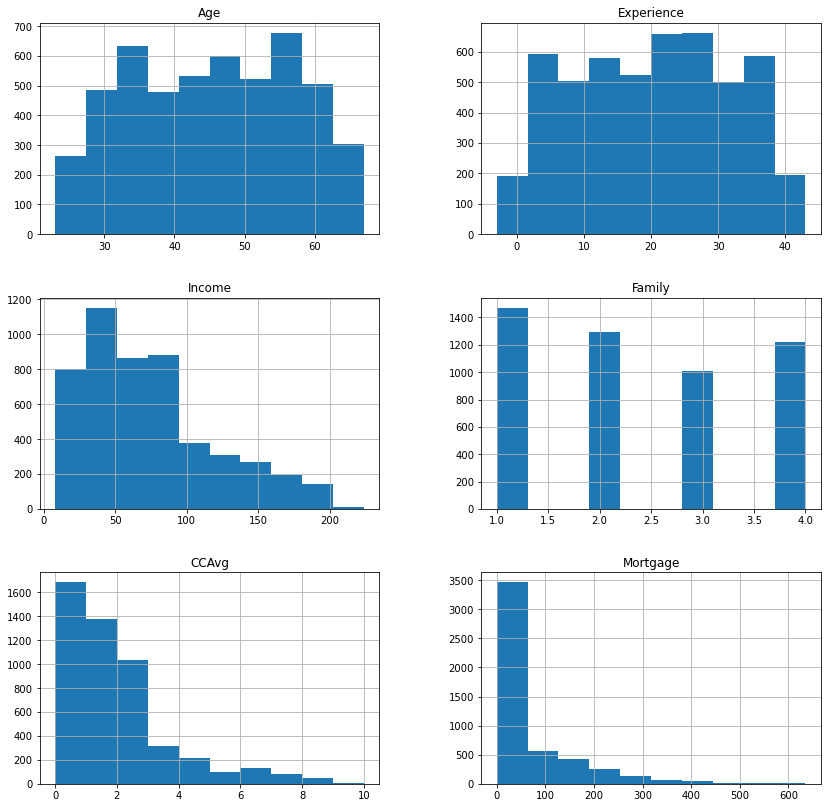

<IPython.core.display.Javascript object>

In [24]:
# creating histograms
df[numeric_cols].hist(figsize=(14, 14))
plt.show()

In [25]:
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)
    print(df[i].value_counts(1))
    print("*" * 50)

Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64
**************************************************
Unique values in Personal_Loan are :
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64
**************************************************
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
0    0.8956
1    0.1044
Name: Securities_Account, dtype: float64
**************************************************
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
0    0.9396
1    0.0604
Name: CD_Account, dtype: float64
*************************

<IPython.core.display.Javascript object>

* `Age`: Average age of people in the dataset is 45 years. Age has a wide range of distribution in the interval of age ~ 23-67 years. From the distribution of this variable, we can observe that most of the people are aged around 35 - 55 years. 
* `Experience`: The average professional experience in years is 20 years. It has a wide range of distribution between 10 to 30 years of experience. The minimum is -3 and the maximum is 43 years of experience. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `Income`: The average income in years is off as it shows average is 73 thousand dollars per year. It has a wide range of distribution between 39 to 98 years of experience. The minimum is 8 and the maximum is 224 years of experience. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable. There's a huge difference in the 75th percentile and maximum value of income indicating the presence of outliers.
* `Family`: The average family size is 2. It has a small range of distribution between 1 to 3. The minimum is 1 and the maximum is 4. There's a small difference between the minimum value and maximum percentile. 
* `CCAvg`: It is right-skewed. On average people spent 1.9 thousand dollars per month. The minimum was 0 and maximum was 10 thousand dollars, indicates that there might be outliers present in the variable. The 25th percentile is 0.7, and the 75th percentile is 2.5.
* `Education`: Most people have an undergraduate degree.
* `Mortgage`: The average is 56 thousand dollars. The minimum is 0 and maximum is 635 thousand dollars. There might be outliers here.
* `Personal_Loan`: ~92% of the customers accepted the personal loan offered in the last campaign.
* `Securities_Account`: Most people have securities account associated with the bank.
* `CD_Account`: Most people have CD account.
* `Online`: ~60% of customers use internet banking facilities.
* `CreditCard`: ~71% of customers use a credit card issued by any other Bank (excluding All life Bank)

* It seems that people with more years of professional experience are more likely to accept personal loans. 
* The amount of money spent with the credit card is skewed. This should be looked at more carefully. 

**Bivariate Analysis:**
* `Personal_Loan vs. Age`: 

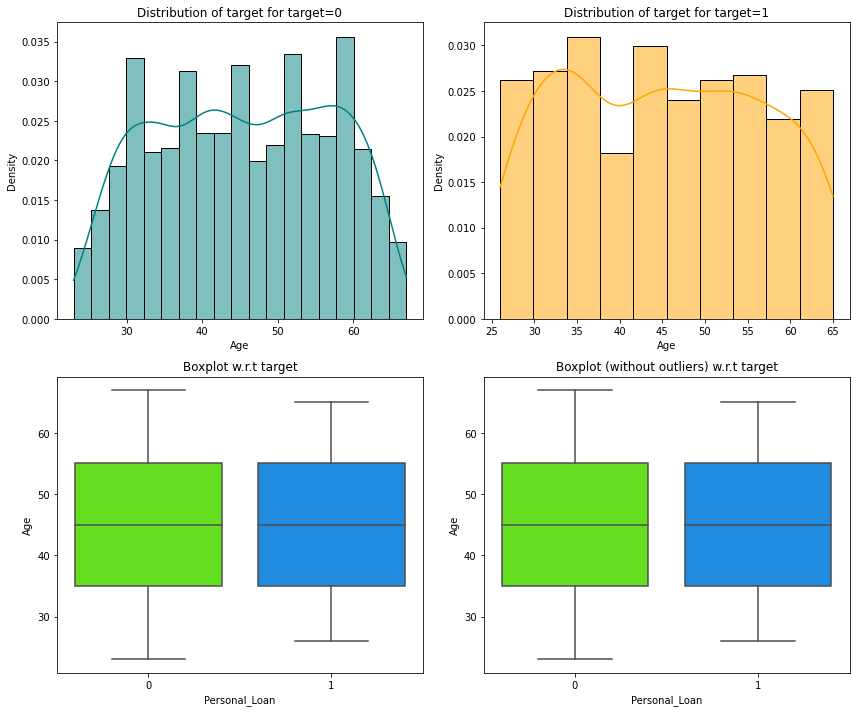

<IPython.core.display.Javascript object>

In [26]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

* People with and without personal loans have an average age of around 45 with and without outliers.
* It seems that the removal of outliers make an impact of the whiskers, but not the 25th, 50th, and 75th percentile.

* `Personal_Loan vs CD_Account`: - 

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


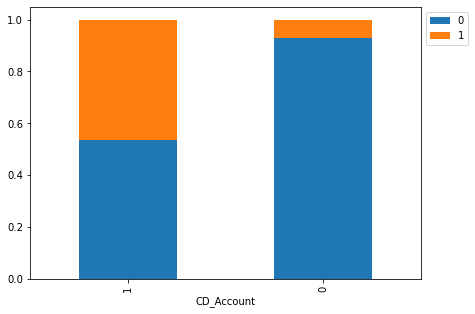

<IPython.core.display.Javascript object>

In [27]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

* ~55% of the people who have personal loans do not have CD account.


* `Personal_Loan vs Securities_Account`:

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


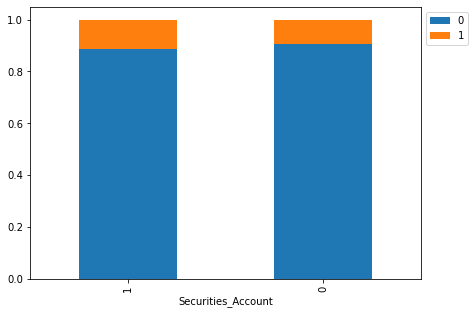

<IPython.core.display.Javascript object>

In [28]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

* More than ~85% of the customers who have (or not have) personal loans also do not have securities account.



* `Personal_Loan vs Online`: 


Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


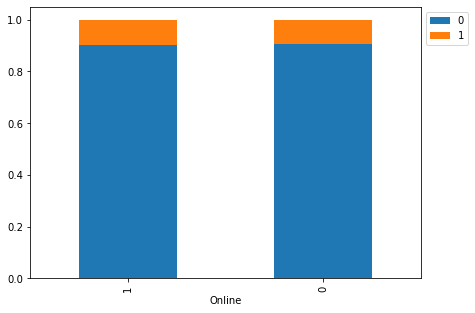

<IPython.core.display.Javascript object>

In [29]:
stacked_barplot(df, "Online", "Personal_Loan")

* More than ~85% of the customers who have (or not have) personal loans also do not use online services. This is strange as the univariate suggested the opposite. 


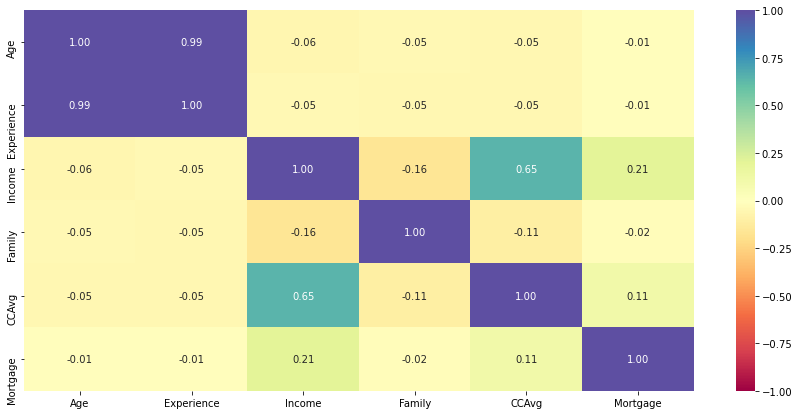

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# 2) Actions for Data Pre-Processing:

* Many variables have outliers that need to be treated.
* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

### Data Pre-Processing

* Dropping capital_gain and capital_loss
* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping capital_gain and capital_loss**

In [31]:
# data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

**Outliers detection using boxplot**

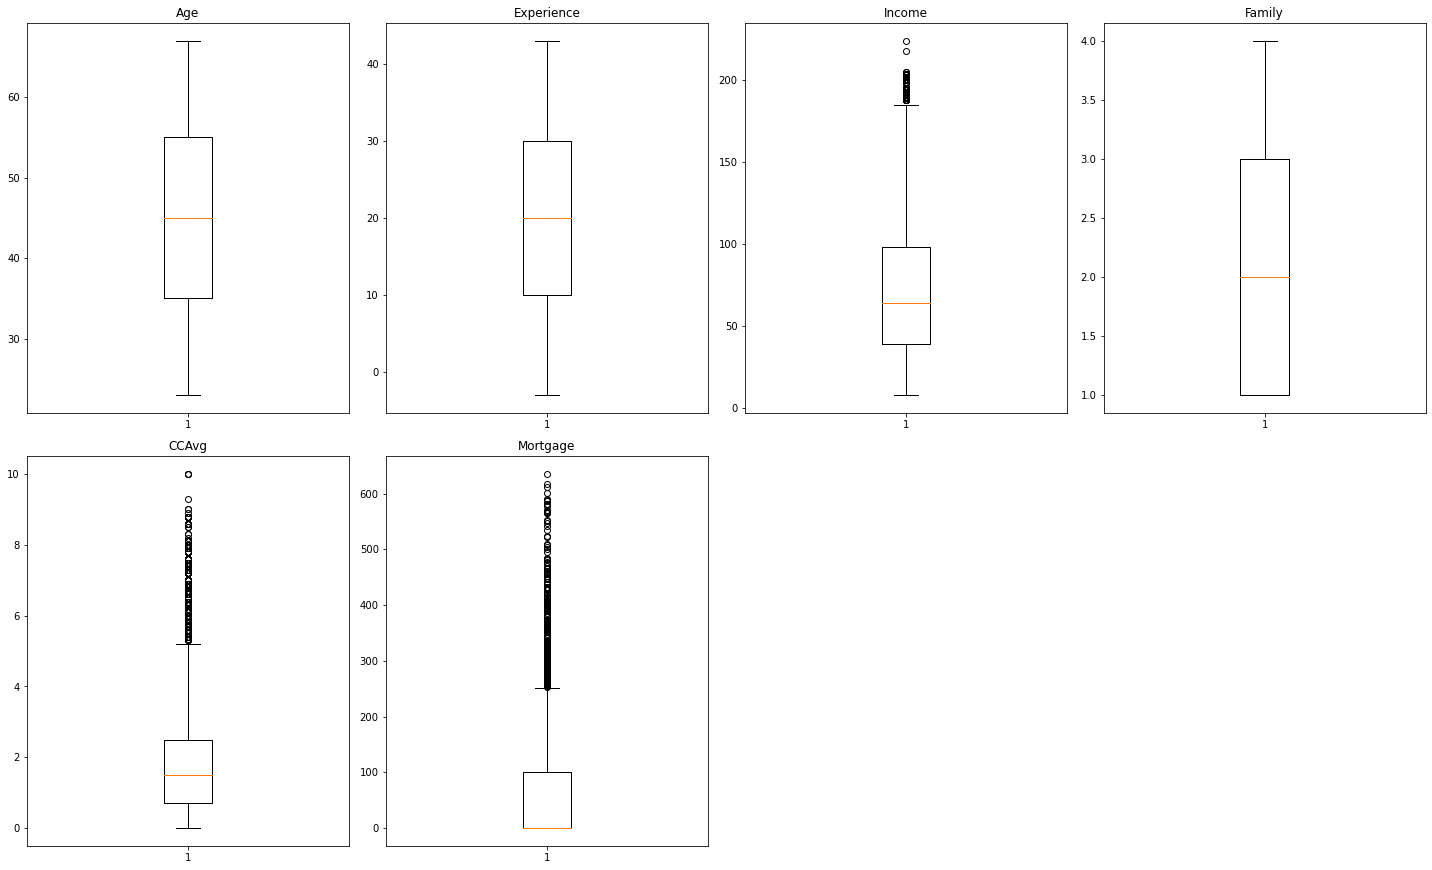

<IPython.core.display.Javascript object>

In [32]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Income, CCAvg, and Mortgage have upper outliers. 
* CD_Account and Securities_Account appear to be almost blank as there is only one line that is at 1.
* Online and CreditCard have median at the extreme ends of 75 percentile and 25 percentile, respectively.

### Treating Outliers

In [33]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

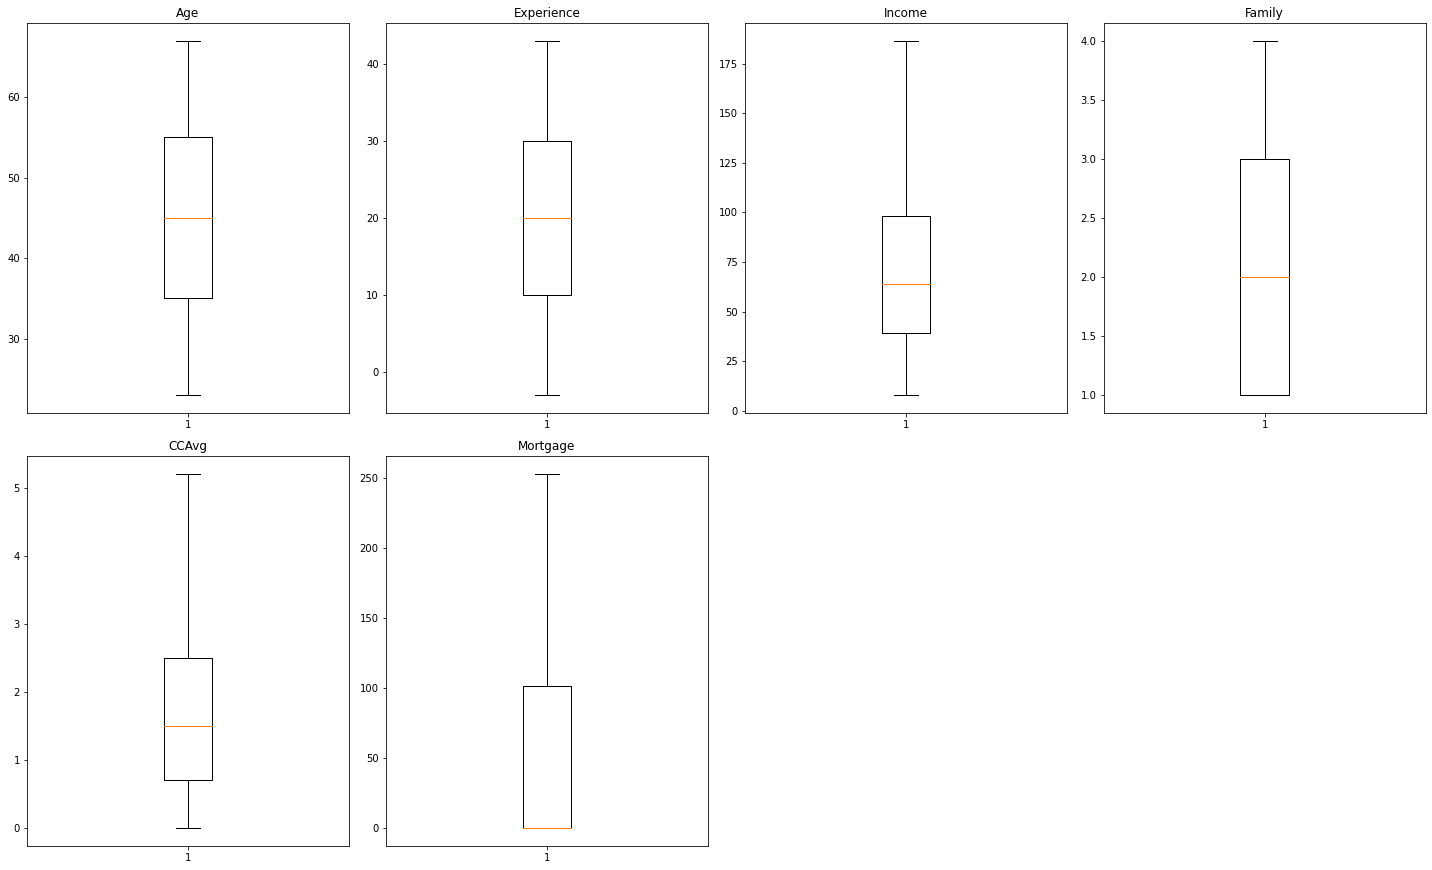

<IPython.core.display.Javascript object>

In [34]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(df, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Without outliers, the boxplots look similar and has not changed significantly. 

### Data Preparation

**Creating training and test sets.**

In [35]:
X = df.drop(["Personal_Loan"], axis=1)
Y = df["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

print(X_train.shape, X_test.shape)

(3500, 5017) (1500, 5017)


<IPython.core.display.Javascript object>

In [36]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [37]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 5017)
Shape of test set :  (1500, 5017)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

# 3) Building the Logistic Model & Model Evaluation Criterion

### Model can make wrong predictions as:
1. Predicting a person has signed up for personal loans but in reality they did not.
2. Predicting a person did not sign up for personal loans but in reality they did.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person has signed up for personal loans but in reality they did not, then a wrong person will be getting extra charges and the bank might lose money and its customer.

* If we predict a person did not sign up for personal loans but in reality they did, that person will not be able to receive the benefits from the bank constituting to opportunity loss from customers all together.


### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [39]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [40]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [41]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression

In [42]:
df["Personal_Loan"]

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal_Loan, Length: 5000, dtype: category
Categories (2, int64): [0, 1]

<IPython.core.display.Javascript object>

In [43]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

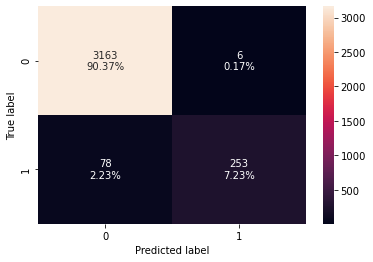

<IPython.core.display.Javascript object>

In [44]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [45]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy   Recall  Precision        F1
0     0.976  0.76435   0.976834  0.857627

<IPython.core.display.Javascript object>

#### Checking performance on test set

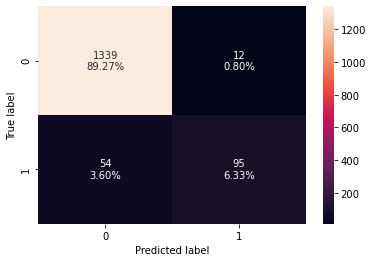

<IPython.core.display.Javascript object>

In [46]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [47]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0     0.956  0.637584    0.88785  0.742188

<IPython.core.display.Javascript object>

#### ROC-AUC

* The area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at distinguishing between classes.

#### 1.  predict_proba

Predicts the probabilities for the class 0 and 1. 

**Input**: Train or test data 

**Output**: Returns the predicted probabilities for class 0 and 1

#### 2. roc_curve_score 

Returns the auc scores

**Input**: 
         1. Training data
         2. Predicted Probability
         
**Output**: AUC scores between 0 and 1
 
#### 3. roc_curve

Returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
 
**Input:** 
        1. Training data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

#### ROC-AUC on training set

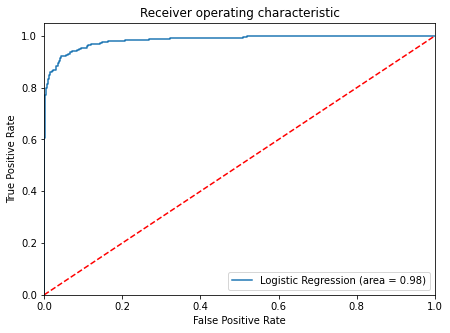

<IPython.core.display.Javascript object>

In [48]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### ROC-AUC on test set

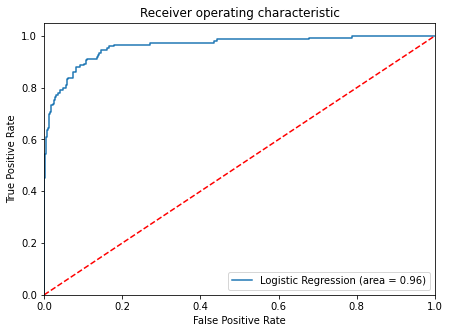

<IPython.core.display.Javascript object>

In [49]:
# Find the roc auc score for test data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

Optimal thresold is the value that best separated the True positive rate and False positive rate. 

In [50]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.18344717541974528


<IPython.core.display.Javascript object>

#### Checking model performance on training set

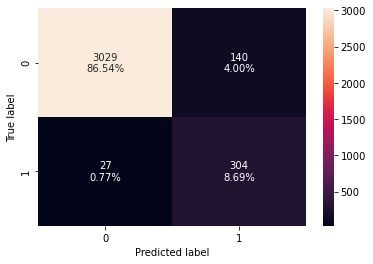

<IPython.core.display.Javascript object>

In [51]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [52]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.952286  0.918429   0.684685  0.784516

<IPython.core.display.Javascript object>

#### Checking model performance on test set

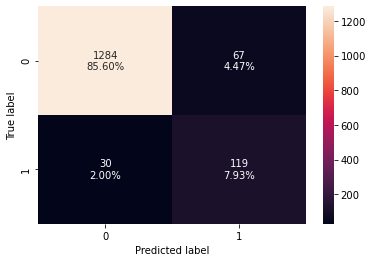

<IPython.core.display.Javascript object>

In [53]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [54]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision        F1
0  0.935333  0.798658   0.639785  0.710448

<IPython.core.display.Javascript object>

* The precision of the model for both training and test set has improved but the F1 score has reduced.

#### Let's use Precision-Recall curve and see if we can find a better threshold

The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement. 

#### precision_recall_curve()

Returns the fpr, tpr and threshold values

**Input:** 
        1. Original data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

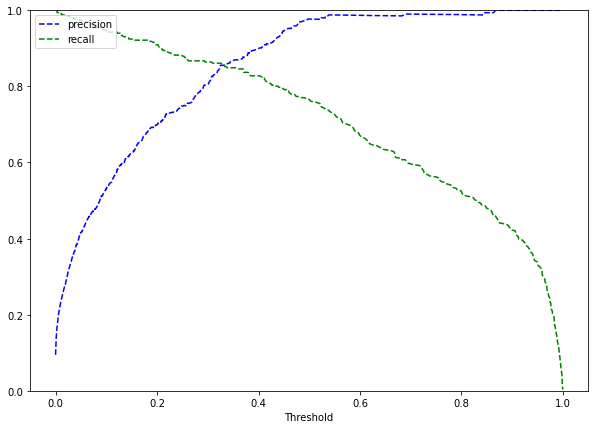

<IPython.core.display.Javascript object>

In [55]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [56]:
for i in range(len(prec)):
    if prec[i] == rec[i]:
        print("Precision and Recall meet at threshold:", tre[i])
        break

Precision and Recall meet at threshold: 0.33177965623452643


<IPython.core.display.Javascript object>

* At the threshold of 0.36, we get unbalanced recall and precision.

In [57]:
# setting the threshold
optimal_threshold_curve = 0.36

<IPython.core.display.Javascript object>

#### Checking model performance on training set

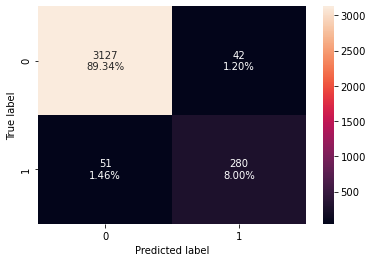

<IPython.core.display.Javascript object>

In [58]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [59]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision       F1
0  0.973429  0.845921   0.869565  0.85758

<IPython.core.display.Javascript object>

#### Checking model performance on test set

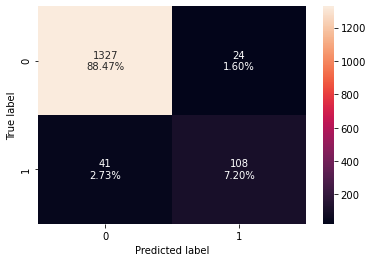

<IPython.core.display.Javascript object>

In [60]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [61]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy    Recall  Precision        F1
0  0.956667  0.724832   0.818182  0.768683

<IPython.core.display.Javascript object>

* There's a significant reduction in recall, precision, and F1 score in the model performance as the default threshold is 0.50 and here we get 0.36 as the optimal threshold.

### Model Performance Summary

In [62]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.14 Threshold",
    "Logistic Regression-0.36 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.14 Threshold  \
Accuracy                      0.976000                            0.952286   
Recall                        0.764350                            0.918429   
Precision                     0.976834                            0.684685   
F1                            0.857627                            0.784516   

           Logistic Regression-0.36 Threshold  
Accuracy                             0.973429  
Recall                               0.845921  
Precision                            0.869565  
F1                                   0.857580

<IPython.core.display.Javascript object>

In [63]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.14 Threshold",
    "Logistic Regression-0.36 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.14 Threshold  \
Accuracy                      0.956000                            0.935333   
Recall                        0.637584                            0.798658   
Precision                     0.887850                            0.639785   
F1                            0.742188                            0.710448   

           Logistic Regression-0.36 Threshold  
Accuracy                             0.956667  
Recall                               0.724832  
Precision                            0.818182  
F1                                   0.768683

<IPython.core.display.Javascript object>

* Accuracy is highest with Logisitic Regression sklearn
* Recall is highest with Logisitic Regression with 0.14 threshold
* Precision is highest with Logisitic Regression sklearn
* f1 score is highest with Logistic Regression 0.36 threshold

# 4) Model Building Decision Tree

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [64]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [65]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

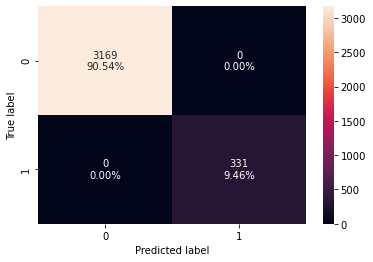

<IPython.core.display.Javascript object>

In [66]:
confusion_matrix_sklearn(model, X_train, y_train)

In [67]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

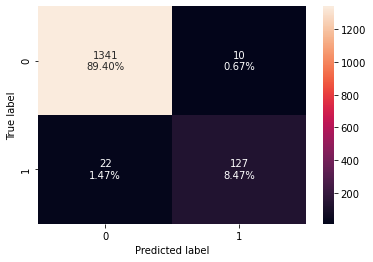

<IPython.core.display.Javascript object>

In [68]:
confusion_matrix_sklearn(model, X_test, y_test)

In [69]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8523489932885906


<IPython.core.display.Javascript object>

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

In [70]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

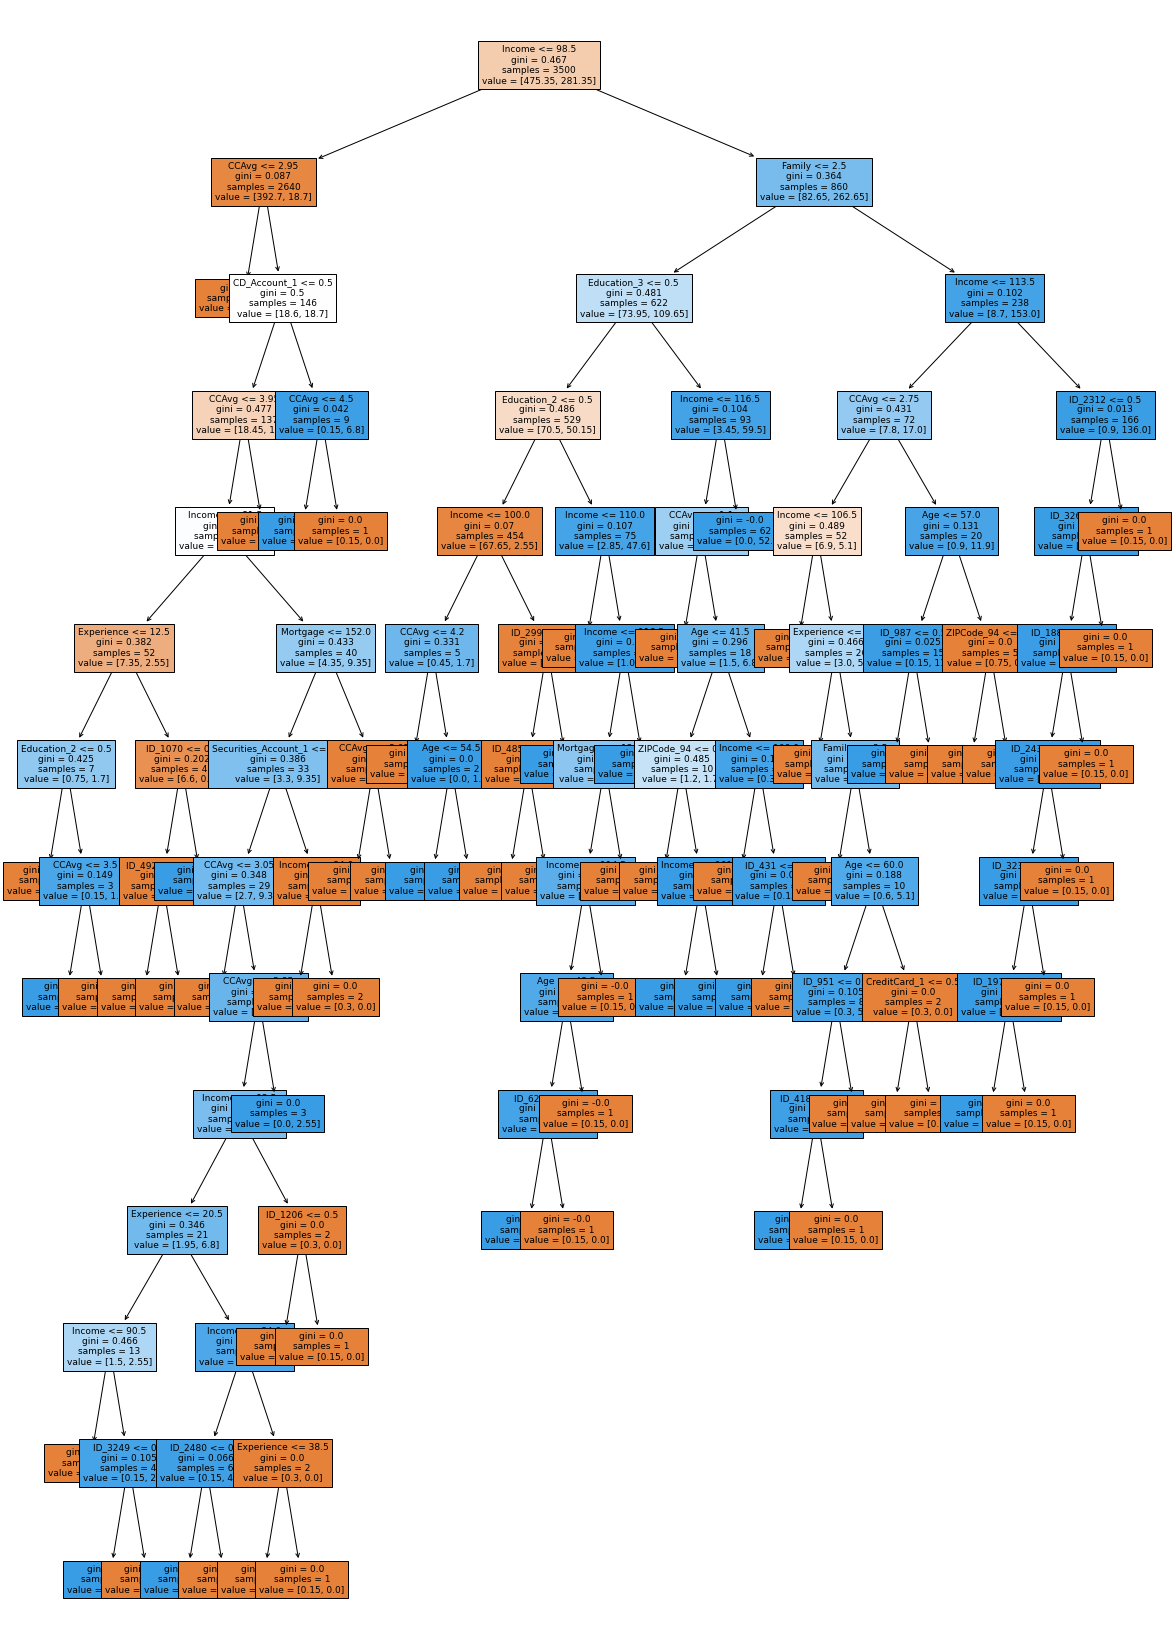

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [72]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- ID_1070 <= 0.50
|   |   |   |   |   |   |   |--- ID_4920 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [6.45, 0.00] class: 0
|   |   |   |   |   |   |   |--- ID_4920 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   

<IPython.core.display.Javascript object>

* The tree above is very complex and difficult to interpret.

In [73]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                  Imp
Income       0.598431
Education_2  0.138851
CCAvg        0.076620
Education_3  0.065629
Family       0.062764
...               ...
ID_1687      0.000000
ID_1686      0.000000
ID_1685      0.000000
ID_1684      0.000000
ID_2504      0.000000

[5017 rows x 1 columns]


<IPython.core.display.Javascript object>

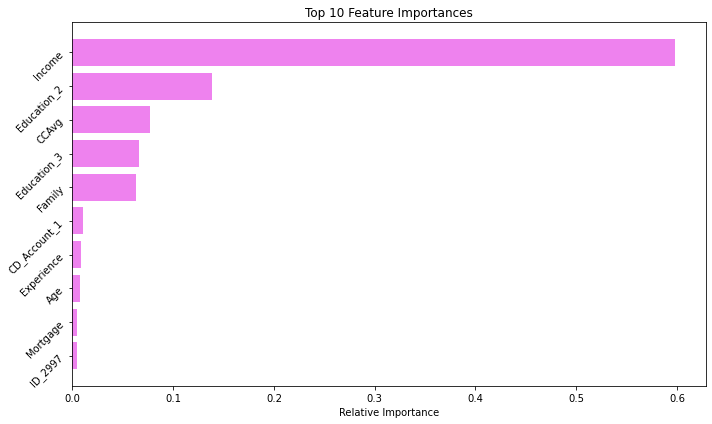

<IPython.core.display.Javascript object>

In [74]:
# importances = model.feature_importances_
# indices = np.argsort(importances)

# plt.figure(figsize=(15, 15))
# plt.title("Feature Importances")
# plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
# plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# plt.xlabel("Relative Importance")
# plt.show()

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(
    range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha="right"
)
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

* According to the decision tree model, Income is the most important variable for predicting personal loans.

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [75]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

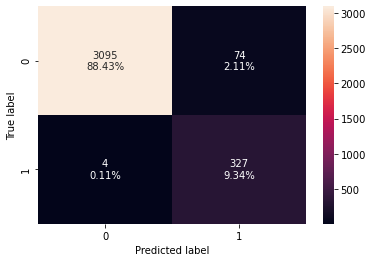

<IPython.core.display.Javascript object>

In [76]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [77]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9879154078549849


<IPython.core.display.Javascript object>

#### Checking performance on test set

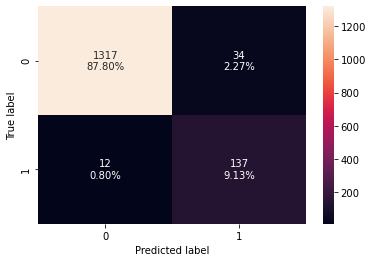

<IPython.core.display.Javascript object>

In [78]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [79]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9194630872483222


<IPython.core.display.Javascript object>

* The model is giving a generalized result now.

## Visualizing the Decision Tree

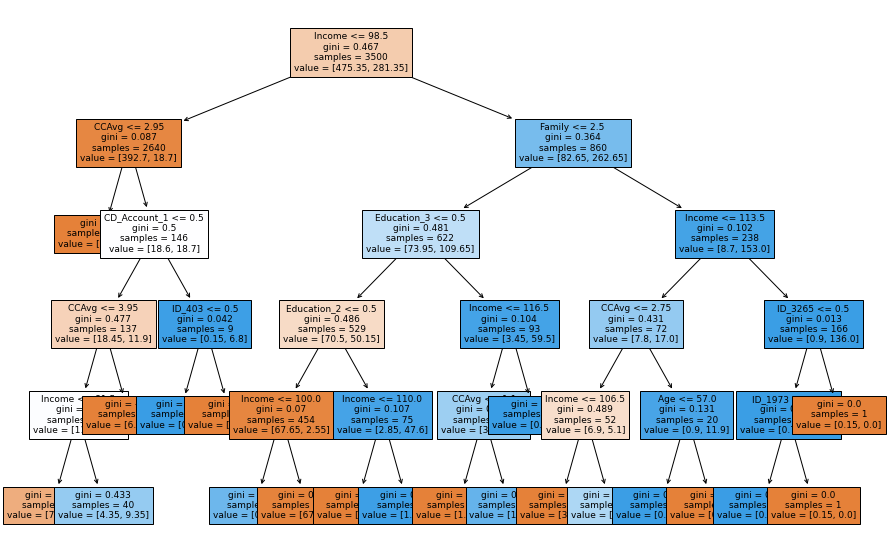

<IPython.core.display.Javascript object>

In [80]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [81]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- ID_403 <= 0.50
|   |   |   |   |--- weights: [0.00, 6.80] class: 1
|   |   |   |--- ID_403 >  0.50
|   |   |   |   |--- weights: [0.15, 0.00] class: 0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 100.00
|   |   |   |   |   |--- weights: [0.45, 1.70] class: 1
|   |   |   |   |--- Income >  100.00
|   |   |   |   |   |--- weights: [67.20, 0.85] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   | 

<IPython.core.display.Javascript object>

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer accepts personal loans, the customer would do so based on his or her income of 107 thousand dollars or less and they spent 3.8 thousand dollars or less on credit card. But if they spend more than 3.36 thousand dollars on credit card, then they may not accept personal loans.

`Interpretations from other decision rules can be made similarly`

In [82]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                   Imp
Income        0.627239
Education_2   0.145712
CCAvg         0.075377
Education_3   0.069962
Family        0.063155
...                ...
ID_1669       0.000000
ID_1668       0.000000
ID_1667       0.000000
ID_1666       0.000000
CreditCard_1  0.000000

[5017 rows x 1 columns]


<IPython.core.display.Javascript object>

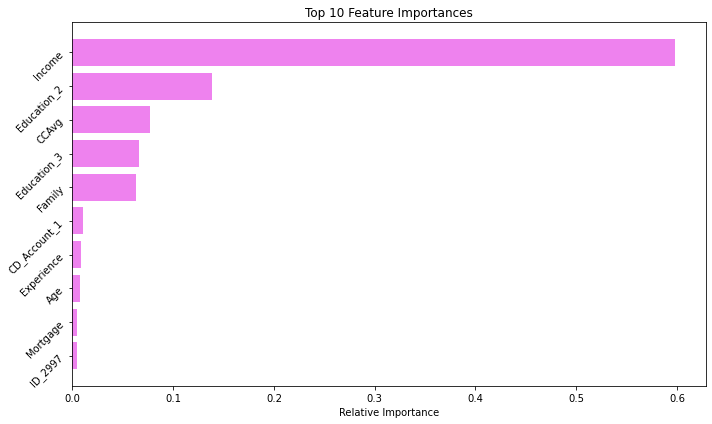

<IPython.core.display.Javascript object>

In [83]:
# importances = estimator.feature_importances_
# indices = np.argsort(importances)

# plt.figure(figsize=(12, 12))
# plt.title("Feature Importances")
# plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
# plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# plt.xlabel("Relative Importance")
# plt.show()

# importances = model.feature_importances_
# indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(
    range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha="right"
)
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

* In tuned decision tree, Income is still the most important feature followed by Family.

## Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [84]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [85]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -4.636967e-15
1   7.482671e-19 -4.636219e-15
2   7.482671e-19 -4.635471e-15
3   1.760629e-18 -4.633710e-15
4   1.760629e-18 -4.631950e-15
5   2.332833e-18 -4.629617e-15
6   4.291532e-18 -4.625325e-15
7   4.665666e-18 -4.620660e-15
8   5.854090e-18 -4.614806e-15
9   6.778420e-18 -4.608027e-15
10  1.084547e-16 -4.499572e-15
11  3.369896e-04  1.010969e-03
12  3.643130e-04  1.375282e-03
13  3.744328e-04  2.124147e-03
14  3.744328e-04  2.873013e-03
15  3.744328e-04  3.247446e-03
16  3.829427e-04  3.630389e-03
17  3.879017e-04  4.018290e-03
18  3.915231e-04  4.409813e-03
19  3.938519e-04  6.772925e-03
20  6.700377e-04  7.442963e-03
21  6.925559e-04  8.135519e-03
22  8.174649e-04  1.222284e-02
23  8.521714e-04  1.392719e-02
24  9.095010e-04  1.483669e-02
25  9.404360e-04  1.577712e-02
26  1.011155e-03  1.678828e-02
27  1.249613e-03  1.928750e-02
28  1.399934e-03  2.068744e-02
29  1.644638e-03  2.233208e-02
30  1.814158e-03  2.596039e-02
31  1.819971e-03  2.778036e-02
32  1.928896e-03  2.970926e-02
33  2.218535e-03  3.192780e-02
34  2.685352e-03  3.729850e-02
35  2.742431e-03  4.004093e-02
36  2.758322e-03  4.279925e-02
37  3.335999e-03  4.613525e-02
38  3.527226e-03  4.966248e-02
39  4.169566e-03  5.383204e-02
40  4.391862e-03  5.822390e-02
41  5.138280e-03  6.336218e-02
42  5.262465e-03  6.862465e-02
43  2.253222e-02  9.115687e-02
44  4.072766e-02  2.133399e-01
45  2.537957e-01  4.671356e-01

<IPython.core.display.Javascript object>

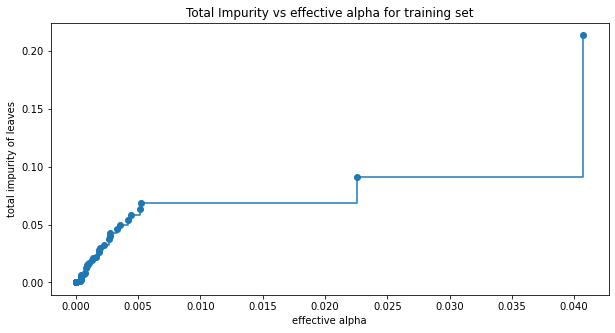

<IPython.core.display.Javascript object>

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [87]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489481034


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

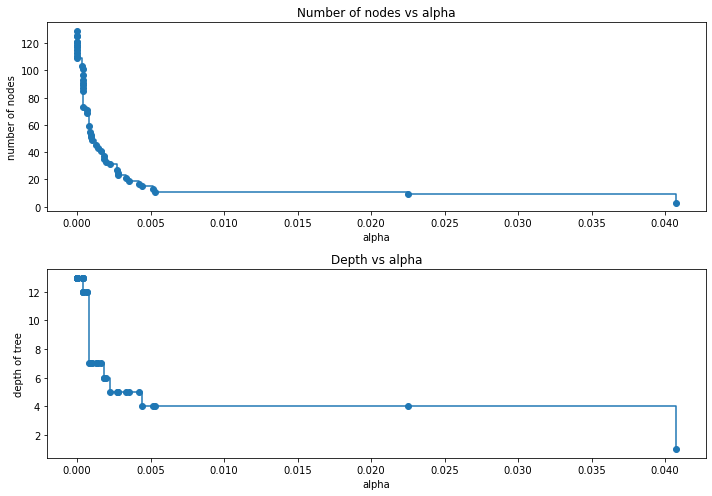

<IPython.core.display.Javascript object>

In [88]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [89]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [90]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [91]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

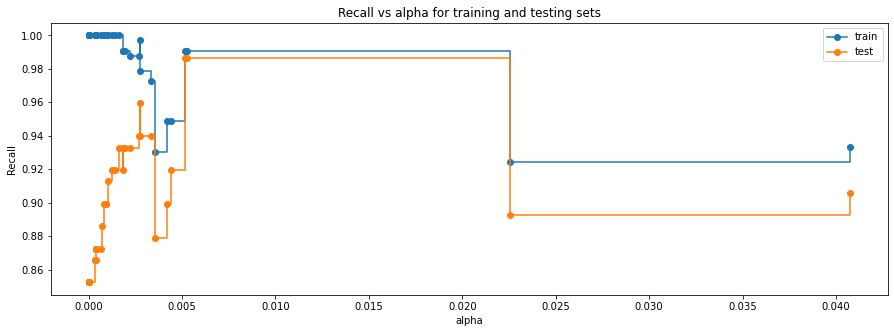

<IPython.core.display.Javascript object>

In [92]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.009 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.**

In [93]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.005138280016554083,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [94]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005138280016554083,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### checking performance on training set

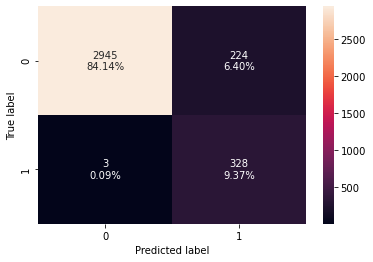

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [96]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9909365558912386


<IPython.core.display.Javascript object>

#### checking performance on test set

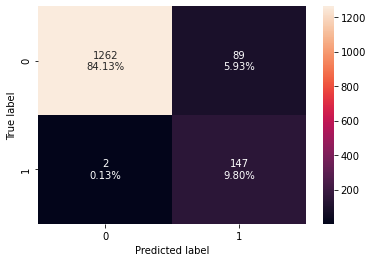

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [98]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9865771812080537


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

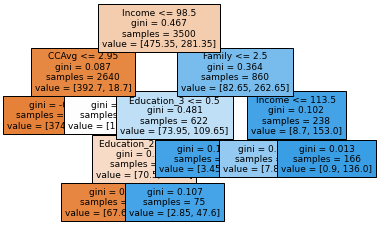

<IPython.core.display.Javascript object>

In [99]:
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.002 ccp_alpha**

In [100]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on the training set

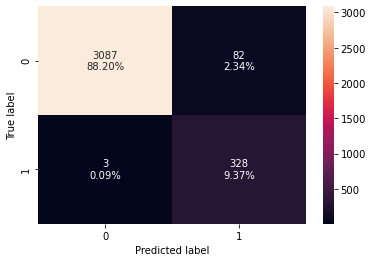

<IPython.core.display.Javascript object>

In [101]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [102]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9909365558912386


<IPython.core.display.Javascript object>

#### Checking performance on the test set

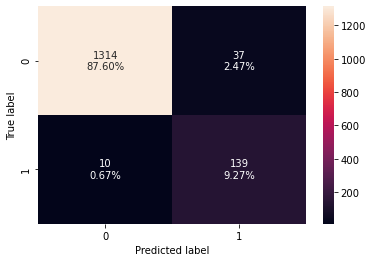

<IPython.core.display.Javascript object>

In [103]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [104]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9328859060402684


<IPython.core.display.Javascript object>

* The results did not improve from the initial model. Rather, it decreased slightly. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

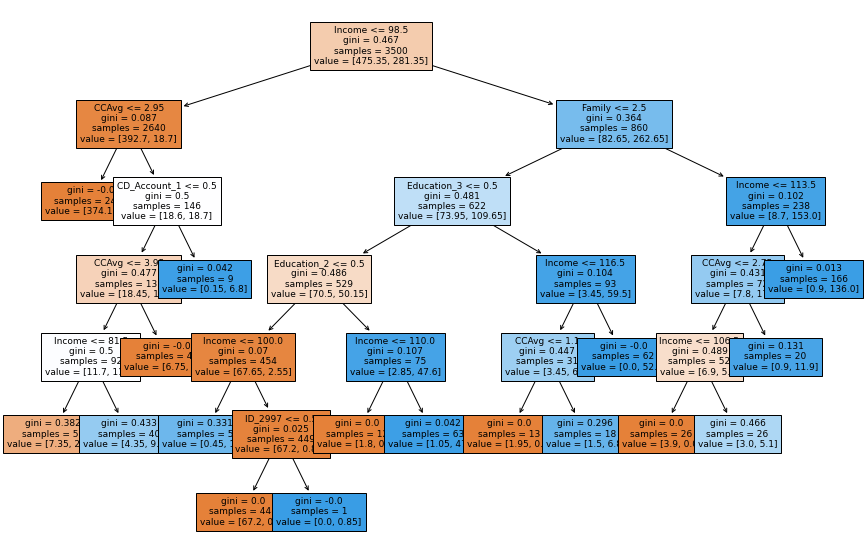

<IPython.core.display.Javascript object>

In [105]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [106]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.15, 6.80] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 100.00
|   |   |   |   |   |--- weights: [0.45, 1.70] class: 1
|   |   |   |   |--- Income >  100.00
|   |   |   |   |   |--- ID_2997 <= 0.50
|   |   |   |   |   |   |--- weights: [67.20, 0.00] class: 0
|   |   |   |   |   |--- ID_2997 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |--- Educ

<IPython.core.display.Javascript object>

In [107]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                   Imp
Income        0.628349
Education_2   0.145970
CCAvg         0.075511
Education_3   0.070086
Family        0.063267
...                ...
ID_1669       0.000000
ID_1668       0.000000
ID_1667       0.000000
ID_1666       0.000000
CreditCard_1  0.000000

[5017 rows x 1 columns]


<IPython.core.display.Javascript object>

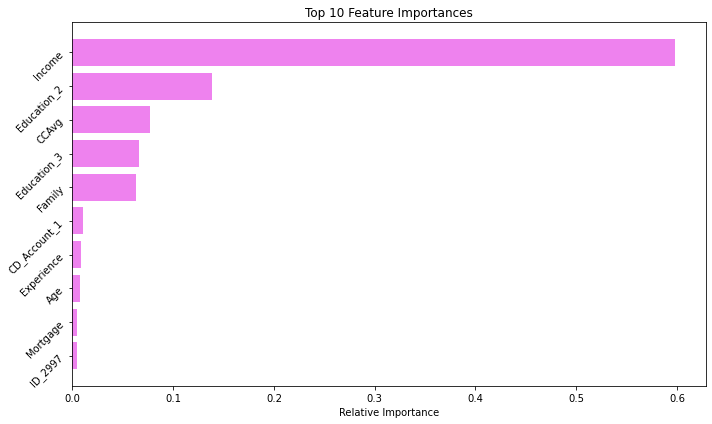

<IPython.core.display.Javascript object>

In [108]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(
    range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha="right"
)
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

* Income and Family are the top two important features to predict chances of a customer accepting personal loans.

### Comparing all the decision tree models

In [109]:
# training performance comparison (perf = pre-pruned)

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                1.000000
1                0.987915
2                0.990937

<IPython.core.display.Javascript object>

In [110]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.852349
1               0.919463
2               0.932886

<IPython.core.display.Javascript object>

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

# 5) Conclusion
- We have been able to build a predictive model that can be used to predict if the customers will accept personal loans, having less than 107K salary. 
- We analyzed using different techniques and used Decision Tree Classifier to build a predictive model.
- The model built can be used to predict if a customer is going to accept personal loans or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Income, Family, Education and CC_Avg are the most important variable in predicting the customers that will contribute to the prediction. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

- Income is one of the significant predictors of salary. AllLife Bank should implement guidelines to ensure that customers can accept personal loans based on their income. The bank should target specifically people with income of 107K dollars or less. 
- There are more chances of people accepting personal loans, if they are around the age of 35. 
- As we saw in our analysis that the average amount of money spend on credit cards was 1.9 thousand dollars. Although average spending of credit card is not a prominent factor, people who spent more than 2.7 thousand dollars might increase chances of customers accepting personal loans. 


* According to the decision tree model - 

    a) If a customer has income of 98k dollars or more, there's a very high chance the customer will not be accpeting personal loans. 
    b) If a customer has income of 98k dollars or less and they spend around 2.95k dollars or less, there is a high chance that they will accept personal loans. Also, if a customer has income of 98k dollars or less and they have undergraduate education or less, there is a high chance that they will accept personal loans. 


* It is observed that the more professional experience the customers have, the more likely there will be older people applying for personal loans. Income and the amount of money spent on credit card also have a strong correlation. AllLife Bank should target people who have less than 98k dollars and spent 2.95k dollars on credit card. 



## <a id='link1'>Appendix</a>

### Univariate analysis

In [111]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# REMEMBER histograms are for continuous variables

<IPython.core.display.Javascript object>

In [112]:
fig = px.histogram(df, x="Age")
fig.show()

<IPython.core.display.Javascript object>

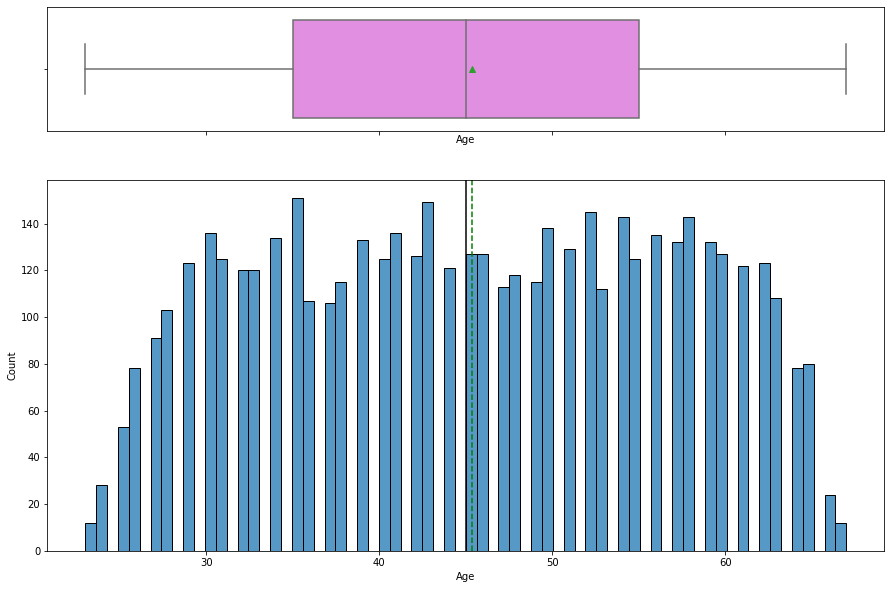

<IPython.core.display.Javascript object>

In [113]:
histogram_boxplot(df, "Age", bins=70)

In [114]:
fig = px.histogram(df, x="Personal_Loan")
fig.show()

<IPython.core.display.Javascript object>

In [115]:
fig = px.histogram(df, x="Experience")
fig.show()

<IPython.core.display.Javascript object>

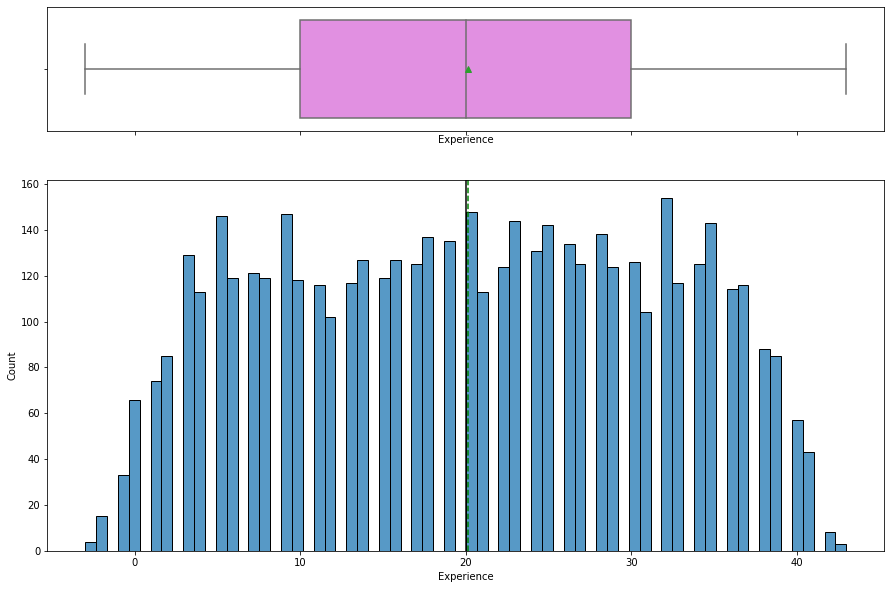

<IPython.core.display.Javascript object>

In [116]:
histogram_boxplot(df, "Experience", bins=70)

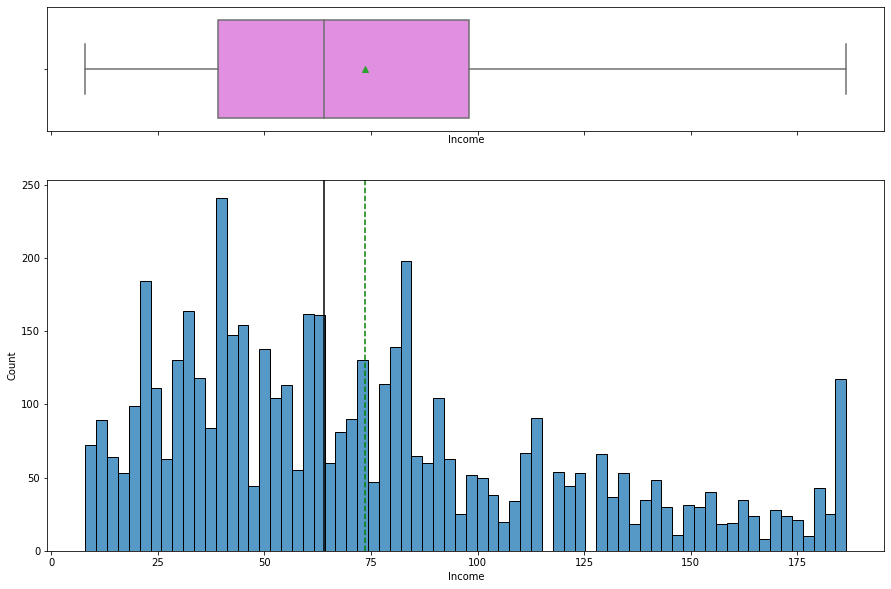

<IPython.core.display.Javascript object>

In [117]:
histogram_boxplot(df, "Income", bins=70)

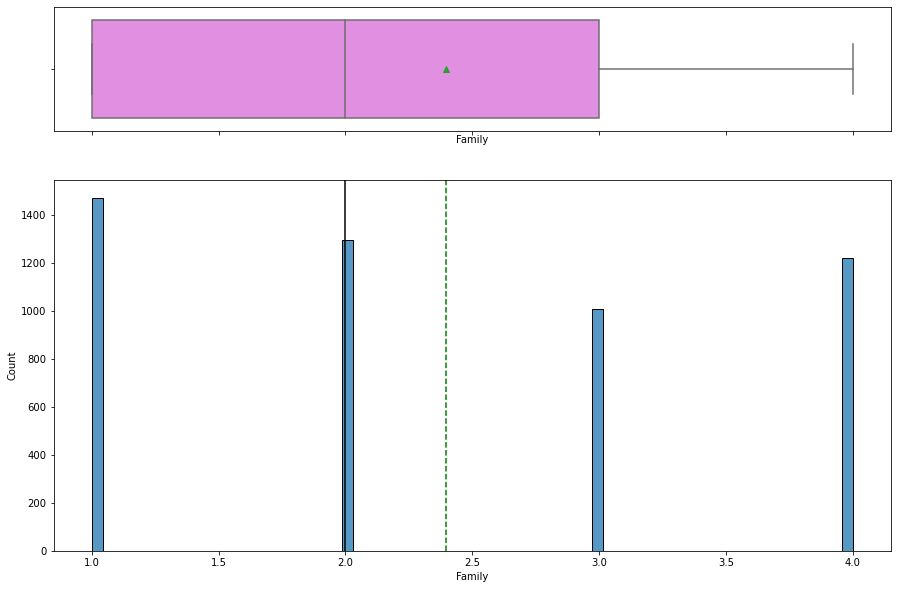

<IPython.core.display.Javascript object>

In [118]:
histogram_boxplot(df, "Family", bins=70)

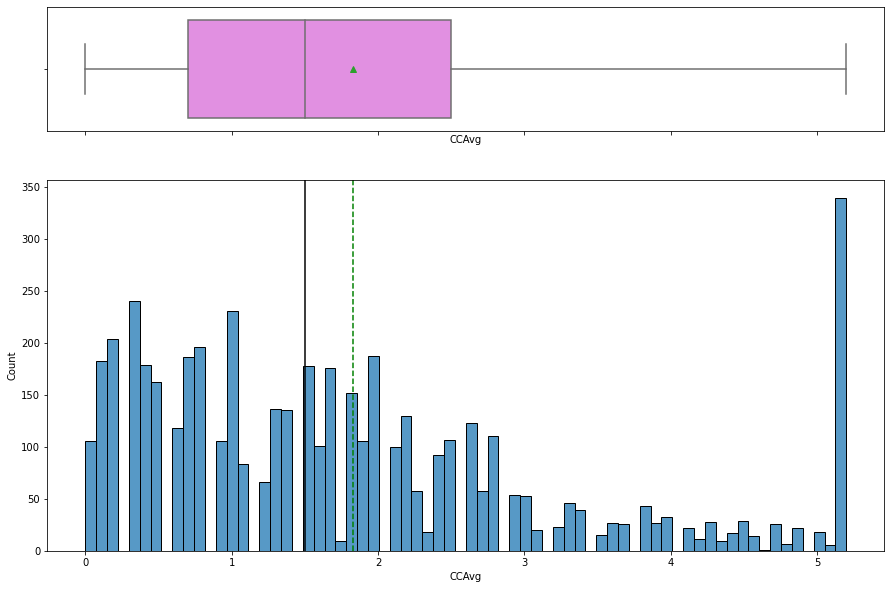

<IPython.core.display.Javascript object>

In [119]:
histogram_boxplot(df, "CCAvg", bins=70)

In [120]:
fig = px.histogram(df, x="Online")
fig.show()

<IPython.core.display.Javascript object>

In [121]:
fig = px.histogram(df, x="CreditCard")
fig.show()

<IPython.core.display.Javascript object>

In [122]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

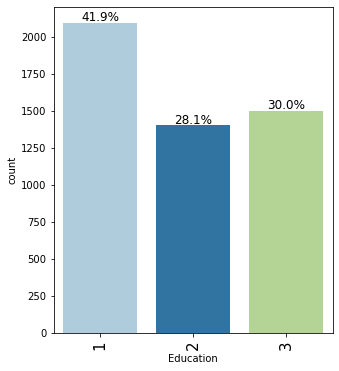

<IPython.core.display.Javascript object>

In [123]:
labeled_barplot(df, "Education", perc=True)

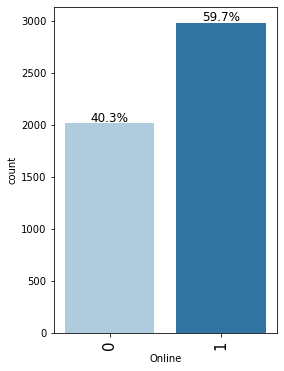

<IPython.core.display.Javascript object>

In [124]:
labeled_barplot(df, "Online", perc=True)

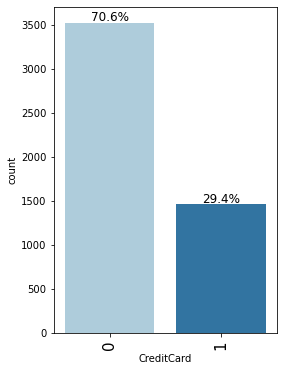

<IPython.core.display.Javascript object>

In [125]:
labeled_barplot(df, "CreditCard", perc=True)

### Bivariate Analysis

**Correlation Plot**

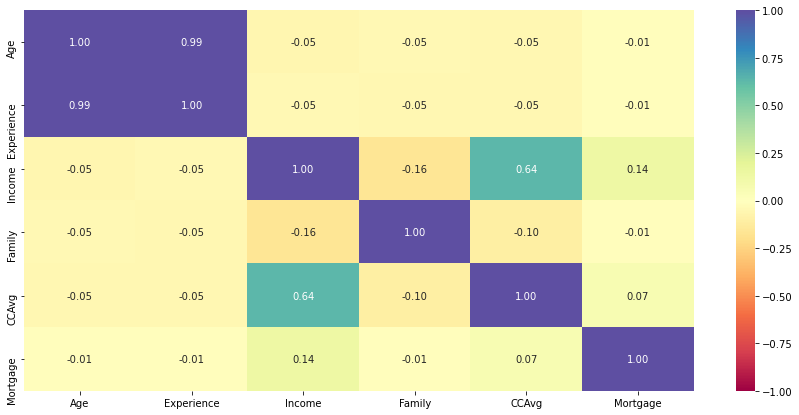

<IPython.core.display.Javascript object>

In [126]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

**Exploring the categorical data with respect to the target**

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


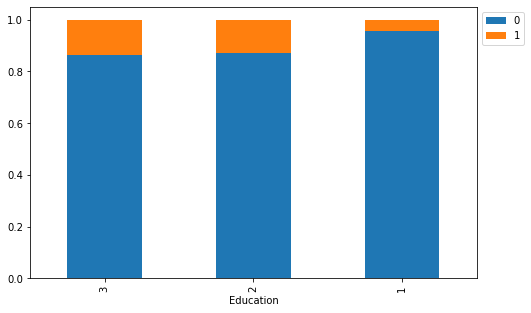

<IPython.core.display.Javascript object>

In [127]:
stacked_barplot(df, "Education", "Personal_Loan")

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


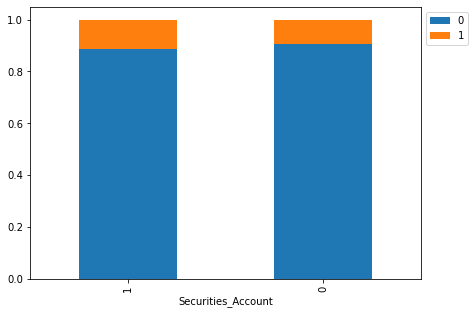

<IPython.core.display.Javascript object>

In [128]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


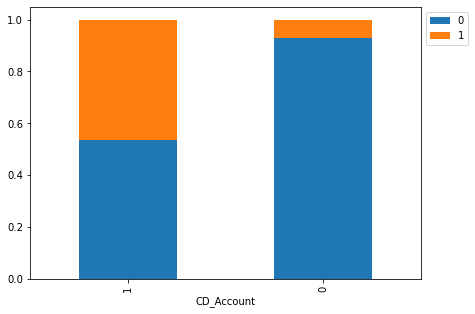

<IPython.core.display.Javascript object>

In [129]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


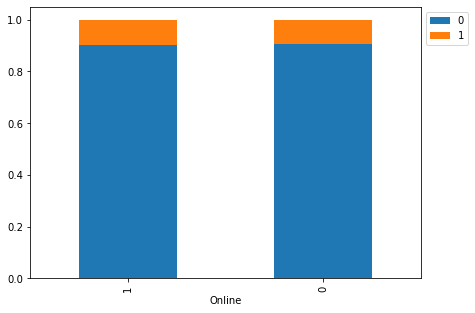

<IPython.core.display.Javascript object>

In [130]:
stacked_barplot(df, "Online", "Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


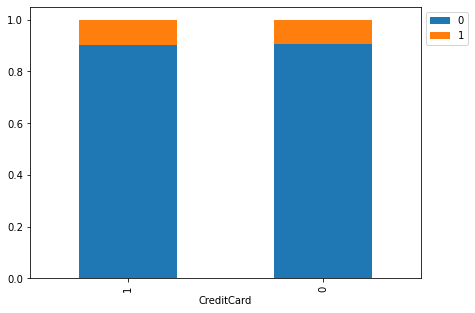

<IPython.core.display.Javascript object>

In [131]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

In [132]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

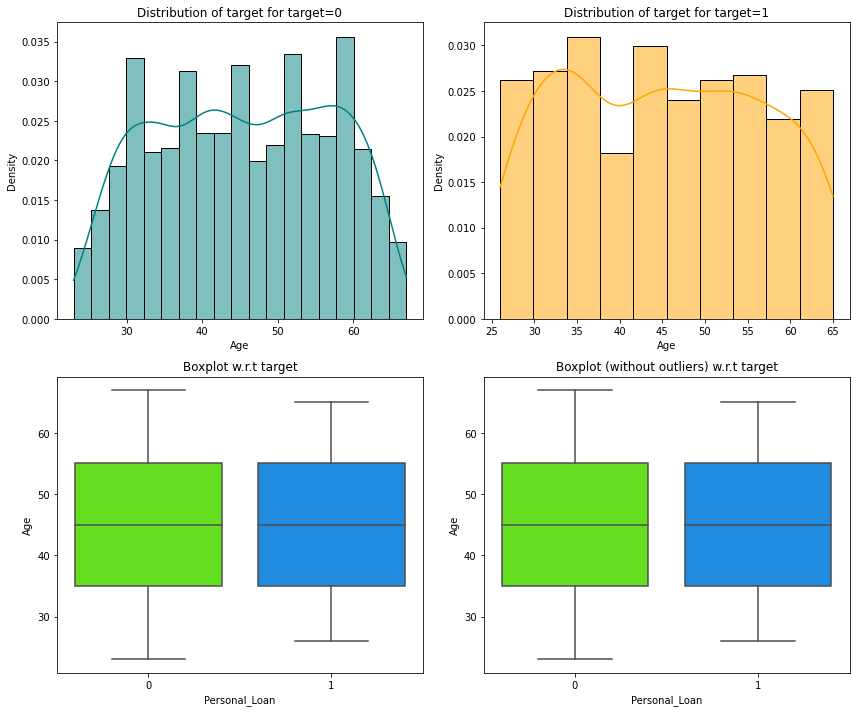

<IPython.core.display.Javascript object>

In [133]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

### To jump back to the EDA summary section, click [here](#eda).

### To jump back to the Data preparation section, click [here](#data_preparation).